# INFORMACION DE PAGOS DATATOOLS

### LIBRERIAS A UTILIZAR

In [15]:
import pandas as pd
from datetime import datetime
import mysql.connector as mc

### VARIABLES PARA IDENTIFICAR HONORARIOS

In [16]:
Dia='08'
Mes='01'
Anio='2019'
fecha_pago=Anio+Mes+Dia
F_Mes='NOVIEMBRE'

### CONECCION A BD

In [17]:
host = '172.18.55.6'
user = 'comandato'
passwd='comandato123'
db = mc.connect(host=host,user=user,passwd=passwd)
cur= db.cursor()

### FUNCIONES A UTILIZAR

In [18]:
def order(frame,var):
    if type(var) is str:
        var = [var] #let the command take a string or list
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame 

In [19]:
def agregar_ceros(base):
    ced=base['CED']
    if len(ced)==9 or len(ced)==12 :
        if ced.isdigit():
            return '0'+ced
    return ced

In [20]:
def dias_mora(base):
    return (datetime.now()-base['FECHAMORA']).days

In [21]:
def cartera(base):
    segmento = base['SEGMENTO']
    cartetra = base['Cartera']
    if cartetra is None:
        cartetra = 'NO ASIGNADO'
    if segmento == 'SIN DEFINIR':
        return cartetra
    return segmento

In [22]:
def mora(base):
    mora1 = base['MORA']
    mora2 = base['Dias_mora']
    if mora1 == 0:
        return mora2
    return mora1

# UNIFICACION BASE DE PAGOS

### RUTAS Y NOMBRES DE LOS ARCHIVOS

In [23]:
pago_corr={
    'ruta':'..\..\..\BASES DATATOOLS\PAGOS\\2018\\Sistema de cobro - '+fecha_pago+'.xlsx',
    'hoja':'PAGOS_CORRIENTE',
    'cartera':'CORRIENTE',
    'identificador':'IDENTIFICACION'
}

pago_cuot={
    'ruta':'..\..\..\BASES DATATOOLS\PAGOS\\2018\\Sistema de cobro - '+fecha_pago+'.xlsx',
    'hoja':'PAGOS_CUOTA_CERO',
    'cartera':'CUOTA',
    'identificador':'ID'
}

pago_conv={
    'ruta':'..\..\..\BASES DATATOOLS\PAGOS\\2018\\Sistema de cobro - '+fecha_pago+'.xlsx',
    'hoja':'PAGOS_CONVENIOS',
    'cartera':'CONVENIO',
    'identificador':'ID'
}

### CARGAR LOS ARCHIVOS

In [24]:
pagos_corr=pd.read_excel(open(pago_corr['ruta'],'rb'), sheet_name=pago_corr['hoja'], dtype={pago_corr['identificador']: str})
pagos_cuot=pd.read_excel(open(pago_cuot['ruta'],'rb'), sheet_name=pago_cuot['hoja'], dtype={pago_cuot['identificador']: str})
pagos_conv=pd.read_excel(open(pago_conv['ruta'],'rb'), sheet_name=pago_conv['hoja'], dtype={pago_conv['identificador']: str})

### PAGOS CORRIENTE

In [25]:
ordenColumn = ['CED','INFRACCION','MONTO','FECHAPAGO','MORA','PAGO','TIPOPAGO','SEGMENTO']

In [26]:
pagos_corr.rename(columns={'IDENTIFICACION':'CED','ID_FACTURA':'INFRACCION','VALOR_INFRACCION':'MONTO',\
                           'FECHA_PAGO':'FECHAPAGO'},inplace=True)
pagos_corr['CED']=pagos_corr.apply(agregar_ceros,axis=1)
pagos_corr['MORA']=0
pagos_corr['PAGO']=pagos_corr['MONTO']
pagos_corr['TIPOPAGO']='TOTAL'
pagos_corr['SEGMENTO']='SIN DEFINIR'
try:
    pagos_corr.drop('CASA COBRO', axis=1, inplace=True)
except:
    pass
pagos_corr = order(pagos_corr,ordenColumn)
pagos_corr.head()

,CED,INFRACCION,MONTO,FECHAPAGO,MORA,PAGO,TIPOPAGO,SEGMENTO
0,0920819265,5297974,57.9,2019-01-02,0,57.9,TOTAL,SIN DEFINIR
1,0908634785,4294228,37.5,2019-01-02,0,37.5,TOTAL,SIN DEFINIR
2,0909391609,5375532,57.9,2019-01-02,0,57.9,TOTAL,SIN DEFINIR
3,0930881529,5107022,38.6,2019-01-02,0,38.6,TOTAL,SIN DEFINIR
4,0922490297,5436594,19.3,2019-01-02,0,19.3,TOTAL,SIN DEFINIR


### PAGOS CUOTA CERO

In [27]:
pagos_cuot.rename(columns={'ID':'CED','ID_FACTURA_INICIAL':'INFRACCION','VALOR_INFRACCION':'MONTO',\
                           'VALOR_PAGO_CAPITAL':'PAGO','FECHA_RE':'FECHAPAGO','DIAS_MORA':'MORA'},inplace=True)
pagos_cuot['CED']=pagos_cuot.apply(agregar_ceros,axis=1)
pagos_cuot['TIPOPAGO']='PARCIAL'
pagos_cuot['SEGMENTO']='SIN DEFINIR'
try:
    pagos_cuot.drop(['ID_CONVENIO','FECHA_EMISION_FINANC','VALOR_CAPITAL','NRO_CUOTA_EMISION'\
                 ,'FECHA_EMISION_INFRACCION','CASA COBRO','ID_CONVENIO','FECHA_REG'],axis=1,inplace=True)
except:
    pass

pagos_cuot = order(pagos_cuot,ordenColumn)
pagos_cuot.head()

,CED,INFRACCION,MONTO,FECHAPAGO,MORA,PAGO,TIPOPAGO,SEGMENTO,ID_CONVENIO,FECHA_EMISION_FINANC,VALOR_CAPITAL,NRO_CUOTA_EMISION,FECHA_EMISION_INFRACCION,CASA COBRO
0,0800467276,5272640,115.80,2019-01-02 15:54:48,172,23.16,PARCIAL,SIN DEFINIR,344833,2019-01-02,46.32,0,2018-07-14,SISTEMA DE COBRO DEL ECUADOR
1,0800467276,5338357,115.80,2019-01-02 15:54:48,159,23.16,PARCIAL,SIN DEFINIR,344833,2019-01-02,46.32,0,2018-07-27,SISTEMA DE COBRO DEL ECUADOR
2,0912757234,3190025,18.75,2019-01-03 12:20:49,634,3.75,PARCIAL,SIN DEFINIR,344851,2019-01-02,71.25,0,2017-04-08,SISTEMA DE COBRO DEL ECUADOR
3,0912757234,3456959,112.50,2019-01-03 12:20:49,569,22.50,PARCIAL,SIN DEFINIR,344851,2019-01-02,71.25,0,2017-06-12,SISTEMA DE COBRO DEL ECUADOR
4,0912757234,3543397,37.50,2019-01-03 12:21:58,547,7.50,PARCIAL,SIN DEFINIR,344852,2019-01-02,53.39,0,2017-07-04,SISTEMA DE COBRO DEL ECUADOR


### PAGOS CUOTA VENCIDA

In [28]:
pagos_conv.rename(columns={'ID':'CED','ID_CONVENIO':'INFRACCION','VALOR_PAGAR_CUOTA':'MONTO',\
                           'FECHA_PAGO':'FECHAPAGO','FECHA_VENCIMIENTO':'FECHAMORA'},inplace=True)
pagos_conv['CED']=pagos_conv.apply(agregar_ceros,axis=1)
try:
    pagos_conv['MORA']=pagos_conv.apply(dias_mora,axis=1)
except:
    pagos_conv['MORA']=pagos_conv['DIAS_MORA']
pagos_conv['PAGO']=pagos_conv['MONTO']
pagos_conv['TIPOPAGO']='TOTAL'
pagos_conv['SEGMENTO']='CONVENIO'
try:
    pagos_conv.drop(['CASA COBRO','NRO_CUOTA_EMISION','FECHAMORA'],axis=1,inplace=True)
except:
    pass
pagos_conv = order(pagos_conv,ordenColumn)
pagos_conv.head()

,CED,INFRACCION,MONTO,FECHAPAGO,MORA,PAGO,TIPOPAGO,SEGMENTO
0,0919719815,237115,65.88,2019-01-02,576,65.88,TOTAL,CONVENIO
1,0919719815,237115,65.88,2019-01-02,637,65.88,TOTAL,CONVENIO
2,0919719815,237115,65.88,2019-01-02,607,65.88,TOTAL,CONVENIO
3,0924821762,278044,86.88,2019-01-02,376,86.88,TOTAL,CONVENIO
4,0924821762,278044,86.88,2019-01-02,406,86.88,TOTAL,CONVENIO


### UNIR BASE DE PAGOS

In [29]:
basePagos = [pagos_corr,pagos_cuot,pagos_conv]
total_pagos=pd.concat(basePagos)
total_pagos.head()

c:\users\michael\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,CASA COBRO,CED,FECHAPAGO,FECHA_EMISION_FINANC,FECHA_EMISION_INFRACCION,ID_CONVENIO,INFRACCION,MONTO,MORA,NRO_CUOTA_EMISION,PAGO,SEGMENTO,TIPOPAGO,VALOR_CAPITAL
0,NaN,0920819265,2019-01-02,NaT,NaT,NaN,5297974,57.9,0,NaN,57.9,SIN DEFINIR,TOTAL,NaN
1,NaN,0908634785,2019-01-02,NaT,NaT,NaN,4294228,37.5,0,NaN,37.5,SIN DEFINIR,TOTAL,NaN
2,NaN,0909391609,2019-01-02,NaT,NaT,NaN,5375532,57.9,0,NaN,57.9,SIN DEFINIR,TOTAL,NaN
3,NaN,0930881529,2019-01-02,NaT,NaT,NaN,5107022,38.6,0,NaN,38.6,SIN DEFINIR,TOTAL,NaN
4,NaN,0922490297,2019-01-02,NaT,NaT,NaN,5436594,19.3,0,NaN,19.3,SIN DEFINIR,TOTAL,NaN


# BASE DE MULTAS ASIGNADAS

In [30]:
multas="""SELECT No_multa AS 'INFRACCION',Dias_mora,Cartera FROM SISTEMECUADOR_ATM.MULTAS_MENSUALES where Mes={0}""".format(Mes)
resultado_multas=pd.read_sql(multas, con=db)
resultado_multas['INFRACCION'] = resultado_multas['INFRACCION'].astype(int)

In [31]:
resultado_multas.head()

,INFRACCION,Dias_mora,Cartera
0,5722394,72,CORRIENTE
1,4929258,249,MENOR
2,4171791,429,CORRIENTE
3,4171793,429,CORRIENTE
4,5433481,138,CORRIENTE


### CRUZAR LOS PAGOS CON LA ASIGNACION

In [32]:
crucepagos=pd.merge(total_pagos,resultado_multas,on=['INFRACCION'],how='left')
crucepagos.Dias_mora = crucepagos.Dias_mora.fillna(1)
crucepagos['Dias_mora'] = crucepagos['Dias_mora'].astype(int)
crucepagos['SEGMENTO'] = crucepagos.apply(cartera,axis = 1)
crucepagos['MORA'] = crucepagos.apply(mora,axis = 1)
try:
    crucepagos.drop(['Dias_mora','Cartera'],axis=1,inplace=True)
except:
    pass
crucepagos.head()

,CASA COBRO,CED,FECHAPAGO,FECHA_EMISION_FINANC,FECHA_EMISION_INFRACCION,ID_CONVENIO,INFRACCION,MONTO,MORA,NRO_CUOTA_EMISION,PAGO,SEGMENTO,TIPOPAGO,VALOR_CAPITAL
0,NaN,0920819265,2019-01-02,NaT,NaT,NaN,5297974,57.9,166,NaN,57.9,MENOR,TOTAL,NaN
1,NaN,0908634785,2019-01-02,NaT,NaT,NaN,4294228,37.5,399,NaN,37.5,CORRIENTE,TOTAL,NaN
2,NaN,0909391609,2019-01-02,NaT,NaT,NaN,5375532,57.9,159,NaN,57.9,MENOR,TOTAL,NaN
3,NaN,0930881529,2019-01-02,NaT,NaT,NaN,5107022,38.6,208,NaN,38.6,CORRIENTE,TOTAL,NaN
4,NaN,0922490297,2019-01-02,NaT,NaT,NaN,5436594,19.3,138,NaN,19.3,MENOR,TOTAL,NaN


In [33]:
crucepagos.TIPOPAGO.value_counts().plot.bar()

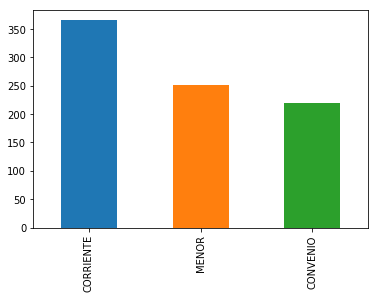

In [34]:
crucepagos.SEGMENTO.value_counts().plot.bar()

In [35]:
def honorarios(base):
    cartera=base['SEGMENTO']
    tipo=base['TIPOPAGO']
    mora=base['MORA']
    valor=base['MONTO']
    pago=base['PAGO']
    if cartera=='CONVENIO':
        return pago*0.035
    if tipo=='PARCIAL'and mora>180:
        return valor*0.05
    if mora<61:
        return pago*0.02
    if mora<181:
        return pago*0.04
    if mora<361:
        return pago*0.05
    if mora>360:
        return pago*0.06
    return 0.0

In [36]:
crucepagos['HONORARIOS']=crucepagos.apply(honorarios,axis=1)

In [40]:
crucepagos.CED.count()

837

In [37]:
crucepagos.head()

,CASA COBRO,CED,FECHAPAGO,FECHA_EMISION_FINANC,FECHA_EMISION_INFRACCION,ID_CONVENIO,INFRACCION,MONTO,MORA,NRO_CUOTA_EMISION,PAGO,SEGMENTO,TIPOPAGO,VALOR_CAPITAL,HONORARIOS
0,NaN,0920819265,2019-01-02,NaT,NaT,NaN,5297974,57.9,166,NaN,57.9,MENOR,TOTAL,NaN,2.316
1,NaN,0908634785,2019-01-02,NaT,NaT,NaN,4294228,37.5,399,NaN,37.5,CORRIENTE,TOTAL,NaN,2.250
2,NaN,0909391609,2019-01-02,NaT,NaT,NaN,5375532,57.9,159,NaN,57.9,MENOR,TOTAL,NaN,2.316
3,NaN,0930881529,2019-01-02,NaT,NaT,NaN,5107022,38.6,208,NaN,38.6,CORRIENTE,TOTAL,NaN,1.930
4,NaN,0922490297,2019-01-02,NaT,NaT,NaN,5436594,19.3,138,NaN,19.3,MENOR,TOTAL,NaN,0.772


In [38]:
crucepagos.SEGMENTO.count()

837

In [39]:
subidos=0
nosubido=0
for row in crucepagos.itertuples():
    insert_querry="""INSERT INTO `sistemecuador_atm`.`pagos_atm`
        (`IDENTIFICACION`,
        `COD_INFRACION`,
        `MONTO_ASIGNADO`,
        `fecha_pago`,
        `DIAS_MORA`,
        `monto_pago`,
        `tipo_pago`,
        `cartera`,
        `honorario`)
        VALUES
        ('{0}',
        '{1}',
        '{2}',
        '{3}',
        '{4}',
        '{5}',
        '{6}',
        '{7}',
        '{8}'); """.format(row.CED,row.INFRACCION,row.MONTO,row.FECHAPAGO,row.MORA,row.PAGO,row.TIPOPAGO,row.SEGMENTO,row.HONORARIOS)
    try:
        cur.execute(insert_querry)
        db.commit()
        subidos = subidos+1
    except:
        db.rollback()
        nosubido=nosubido+1
        
print(subidos)

711
